In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")

# Appropriateness of Data preparation

In [2]:
# Load data into pandas dataframes
baskets = pd.read_csv("baskets_sample.csv")
category = pd.read_csv("category_spends_sample.csv")
customers = pd.read_csv("customers_sample.csv")
lineitems = pd.read_csv("lineitems_sample.csv")

In [3]:
#Remove null values and duplicates.
baskets.isnull()
baskets.drop_duplicates(inplace=True)
category.isnull()
category.drop_duplicates(inplace=True)
customers.isnull()
customers.drop_duplicates(inplace=True)
lineitems.isnull()
lineitems.drop_duplicates(inplace=True)

In [4]:
#To view the data content of each table
print(baskets.head())
print()
print()
print(baskets.describe())
print()
print()
print(baskets.info())

   customer_number        purchase_time  basket_quantity basket_spend  \
0            11911  2007-03-01 07:06:00                7        £3.09   
1             4047  2007-03-01 07:13:00                9        £7.99   
2             3571  2007-03-01 07:27:00                9       £37.06   
3             4079  2007-03-01 07:34:00               11       £11.91   
4             6063  2007-03-01 07:36:00                3        £1.45   

   basket_categories  
0                  3  
1                  5  
2                  6  
3                  5  
4                  1  


       customer_number  basket_quantity  basket_categories
count    195547.000000    195547.000000      195547.000000
mean       7896.492899         8.955218           4.231990
std        4408.251411         9.510890           2.478016
min          14.000000       -11.000000           1.000000
25%        4323.000000         3.000000           2.000000
50%        7944.000000         6.000000           4.000000
75%     

In [5]:
print(category.head())
print()
print()
print(category.describe())
print()
print()
print(category.info())

   customer_number  BAKERY  CASHPOINT  CONFECTIONARY   DAIRY   DELI  \
0               14    7.40        0.0          25.53  236.09   0.00   
1               45    9.45        0.0         126.32  181.58   0.00   
2               52    1.04        0.0           3.29    5.19  26.24   
3               61   14.08        0.0          69.29   61.15   3.81   
4               63   12.12        0.0          75.66   43.60  11.67   

   DISCOUNT_BAKERY  DRINKS  FROZEN  FRUIT_VEG  ...  GROCERY_HEALTH_PETS  \
0             1.25   189.8   20.57      14.48  ...                25.40   
1             0.00     0.0    4.51      30.21  ...                13.76   
2             0.00     0.0    1.78      56.27  ...                13.63   
3             0.00    13.0   21.96      83.74  ...                19.63   
4             0.00     0.0    3.88      22.01  ...                 7.47   

   LOTTERY   MEAT  NEWSPAPERS_MAGAZINES  PRACTICAL_ITEMS  PREPARED_MEALS  \
0      0.0  88.46                  6.40       

In [6]:
print(customers.head())
print()
print()
print(customers.describe())
print()
print()
print(customers.info())

   customer_number  baskets  total_quantity  average_quantity  total_spend  \
0               14       56             531              9.48       675.72   
1               45       33             655             19.85       585.73   
2               52       59             294              4.98       222.18   
3               61       37             499             13.49       547.87   
4               63       48             281              5.85       293.34   

   average_spend  
0          12.07  
1          17.75  
2           3.77  
3          14.81  
4           6.11  


       customer_number      baskets  total_quantity  average_quantity  \
count      3000.000000  3000.000000     3000.000000       3000.000000   
mean       8095.724333    65.182333      583.722000         11.273507   
std        4686.259488    47.464717      405.006359          8.538024   
min          14.000000     1.000000        6.000000          1.200000   
25%        4044.750000    32.000000      307.75000

In [7]:
print(lineitems.head())
print()
print()
print(lineitems.describe())
print()
print()
print(lineitems.info())

   customer_number        purchase_time  product_id             category  \
0            14577  2007-03-10 11:58:00      722653         GROCERY_FOOD   
1             7210  2007-03-22 10:53:00      696136  GROCERY_HEALTH_PETS   
2             3145  2007-03-26 11:17:00      139543  GROCERY_HEALTH_PETS   
3             2649  2007-03-12 16:05:00       34890               BAKERY   
4              859  2007-03-10 09:53:00      613984               BAKERY   

   quantity  spend  
0         1  £1.39  
1         1  £4.25  
2         1  £0.50  
3         1  £0.57  
4         1  £1.59  


       customer_number    product_id      quantity
count     1.461201e+06  1.461201e+06  1.461201e+06
mean      7.748205e+03  3.940977e+05  1.198351e+00
std       4.405106e+03  2.989736e+05  5.990929e-01
min       1.400000e+01  2.200000e+01 -1.300000e+01
25%       4.028000e+03  6.027800e+04  1.000000e+00
50%       7.823000e+03  5.612280e+05  1.000000e+00
75%       1.121100e+04  6.953890e+05  1.000000e+00
max    

In [8]:
# replace the '£' in the 'spend' column in each table.
baskets.basket_spend = baskets.basket_spend.str.replace("£","")
baskets.basket_spend = baskets.basket_spend.astype(float)
baskets['purchase_time'] = pd.to_datetime(baskets['purchase_time'], format='%Y/%m/%d %H:%M')

lineitems.spend = lineitems.spend.str.replace("£","")
lineitems.spend = lineitems.spend.astype(float)
lineitems['purchase_time'] = pd.to_datetime(lineitems['purchase_time'], format='%Y/%m/%d %H:%M')

In [9]:
# View the Earliest time and Latest time
print('Earliest time：', baskets['purchase_time'].min())
print('Latest time：', baskets['purchase_time'].max())

# the percentage of customers who made purchases recently
august_customers = baskets[(baskets['purchase_time'].dt.month == 8)]['customer_number'].nunique()
num_customers = baskets['customer_number'].nunique()
print("Proportion of august customers ：",august_customers/num_customers)

Earliest time： 2007-03-01 07:06:00
Latest time： 2007-08-31 21:55:00
Proportion of august customers ： 0.934


# Appropriateness of Feature Selection/Engineering

In [10]:
#Process the data and keep the selected features
customers['number_of_visits'] = customers['baskets']
customers['average_spend_per_item'] = customers['total_spend']/customers['total_quantity']
customers['average_basket_spend'] = customers['average_spend']
customers['average_item_count'] = customers['average_quantity']
customers = customers.iloc[:,[0,4,6,7,8,9]]
customers

customer_number  total_spend  number_of_visits  average_spend_per_item  \
0                  14       675.72                56                1.272542   
1                  45       585.73                33                0.894244   
2                  52       222.18                59                0.755714   
3                  61       547.87                37                1.097936   
4                  63       293.34                48                1.043915   
...               ...          ...               ...                     ...   
2995            16295       679.70                54                2.110870   
2996            16301       251.43                42                0.938172   
2997            16303       354.32                56                1.070453   
2998            16306       462.81                29                1.542700   
2999            16316       330.40                17                1.551174   

      average_basket_spend  average_item_count  
0                    12.07                9.48  
1                    17.75               19.85  
2                     3.77                4.98  
3                    14.81               13.49  
4                     6.11                5.85  
...                    ...                 ...  
2995                 12.59                5.96  
2996                  5.99                6.38  
2997                  6.33                5.91  
2998                 15.96               10.34  
2999                 19.44               12.53  

[3000 rows x 6 columns]

In [11]:
# save the customer id and the drop it
customer_columns = customers.iloc[:,0]
customers = customers.drop('customer_number', axis = 1)

<Axes: >

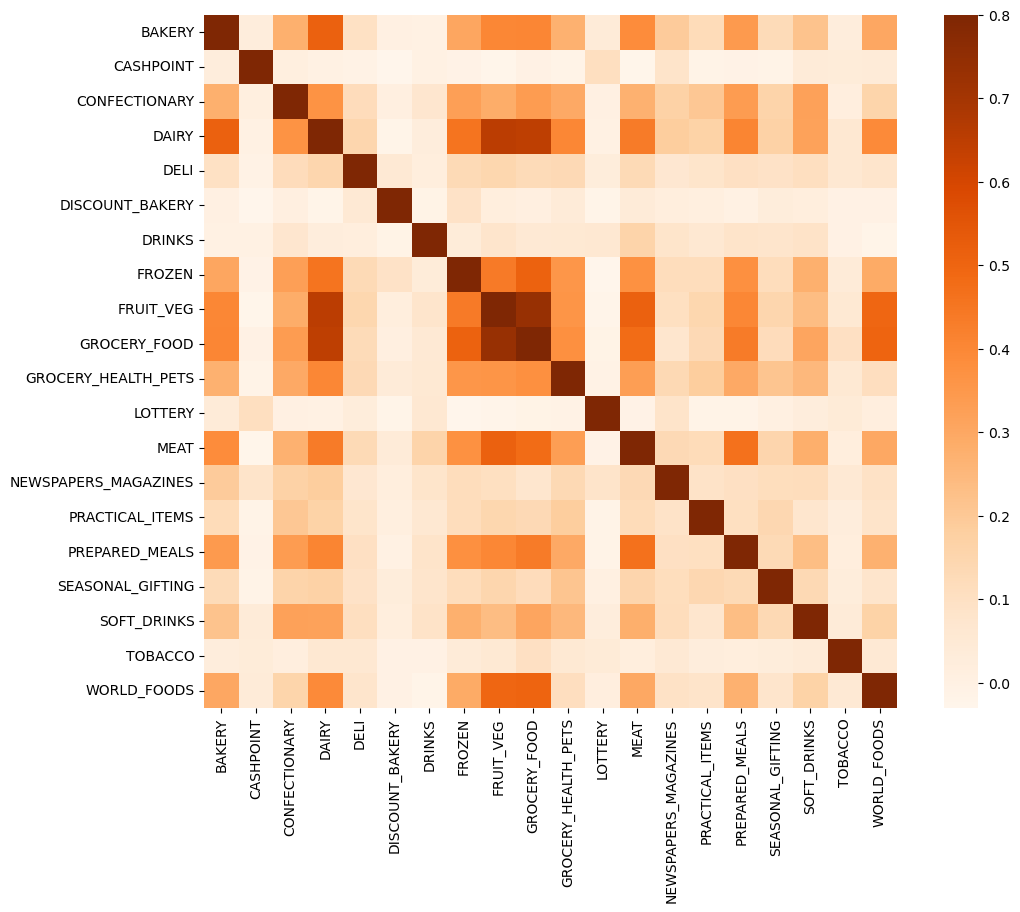

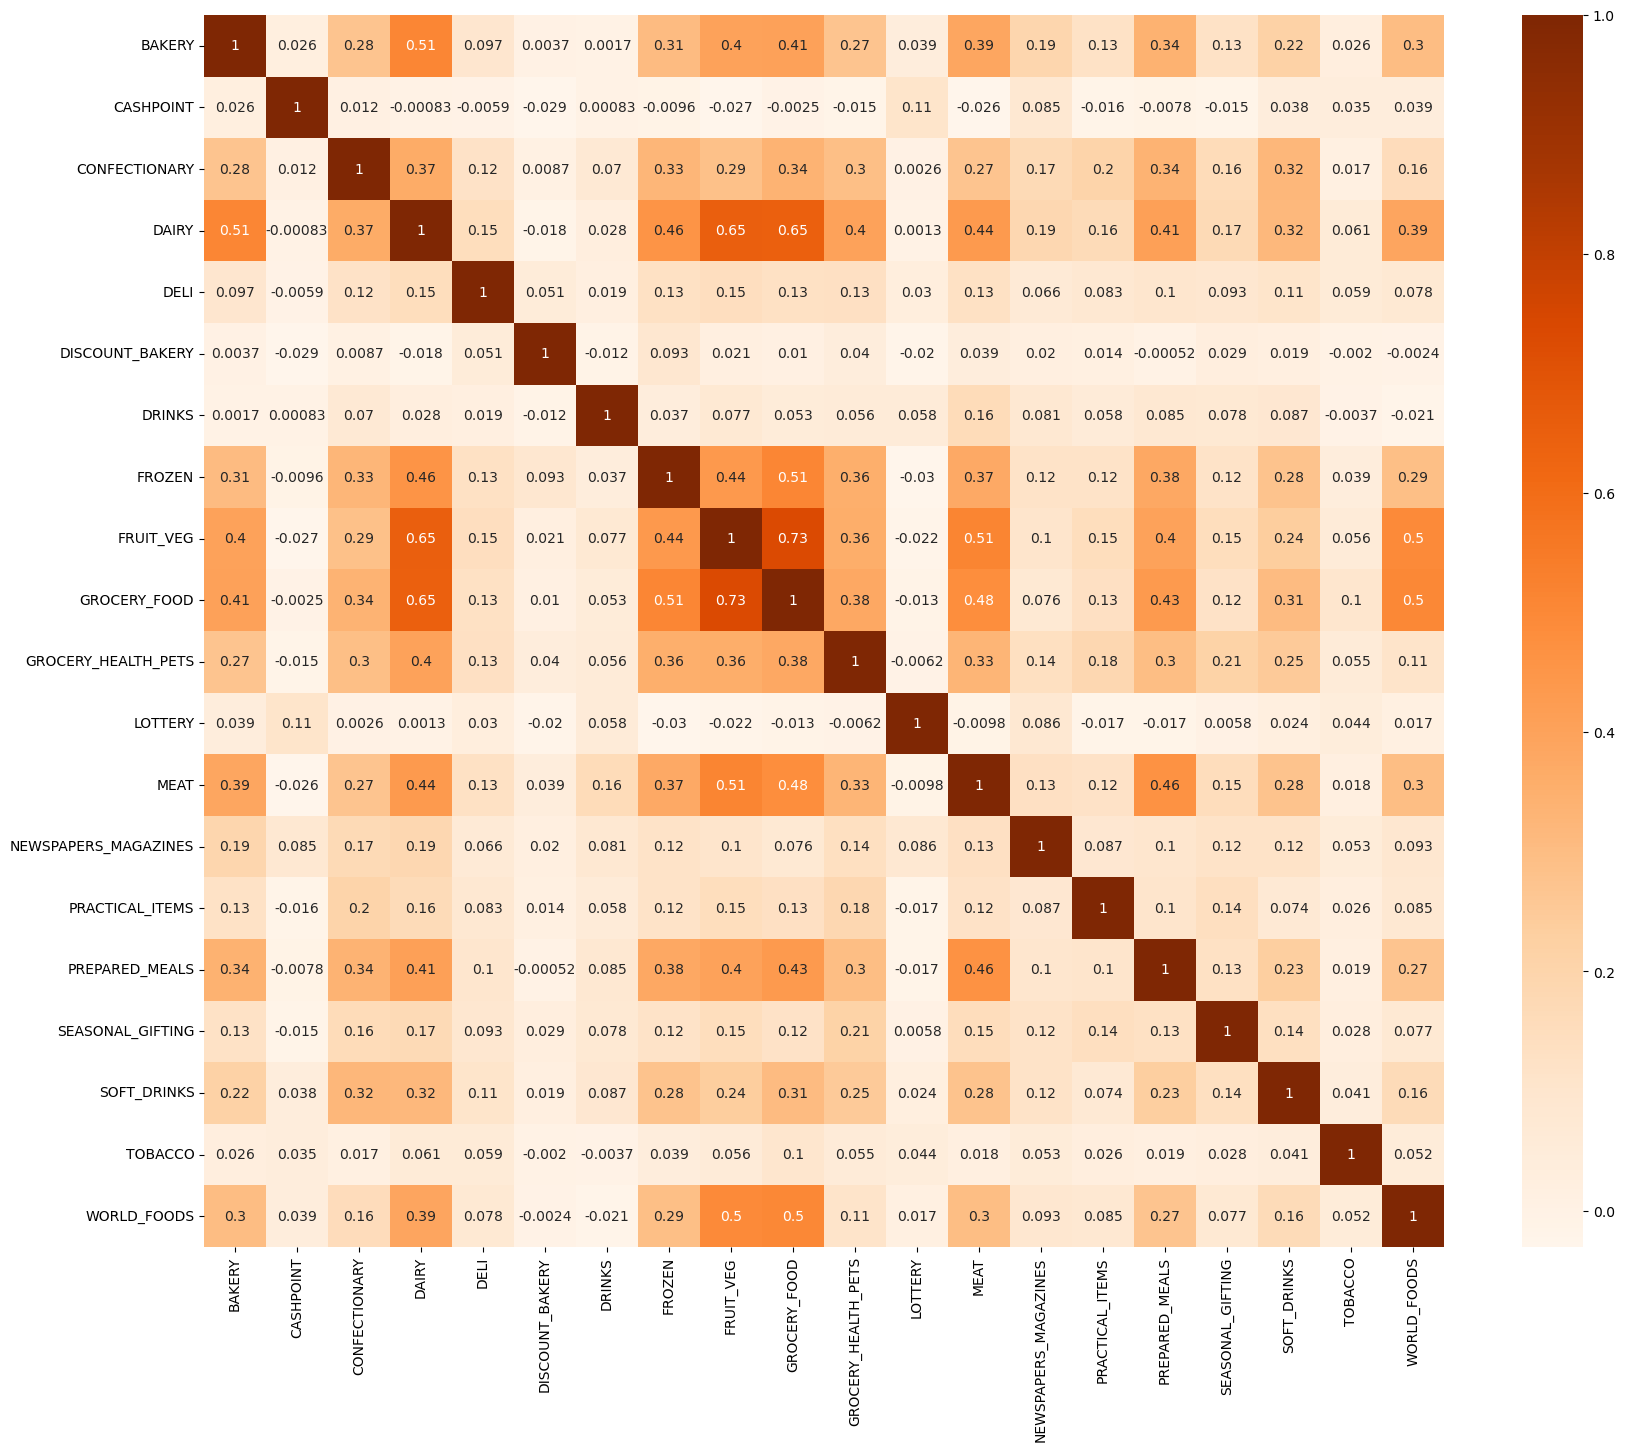

In [12]:
# drop customer id
category = category.drop('customer_number', axis = 1)

# The correlation coefficients between each feature
corr = category.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,cmap="Oranges", vmax=.8, square=True)

plt.figure(figsize=(20, 16))
sns.heatmap(corr, cmap="Oranges", annot=True)
#plt.savefig('The correlation coefficients between each feature.jpg',dpi=1080)


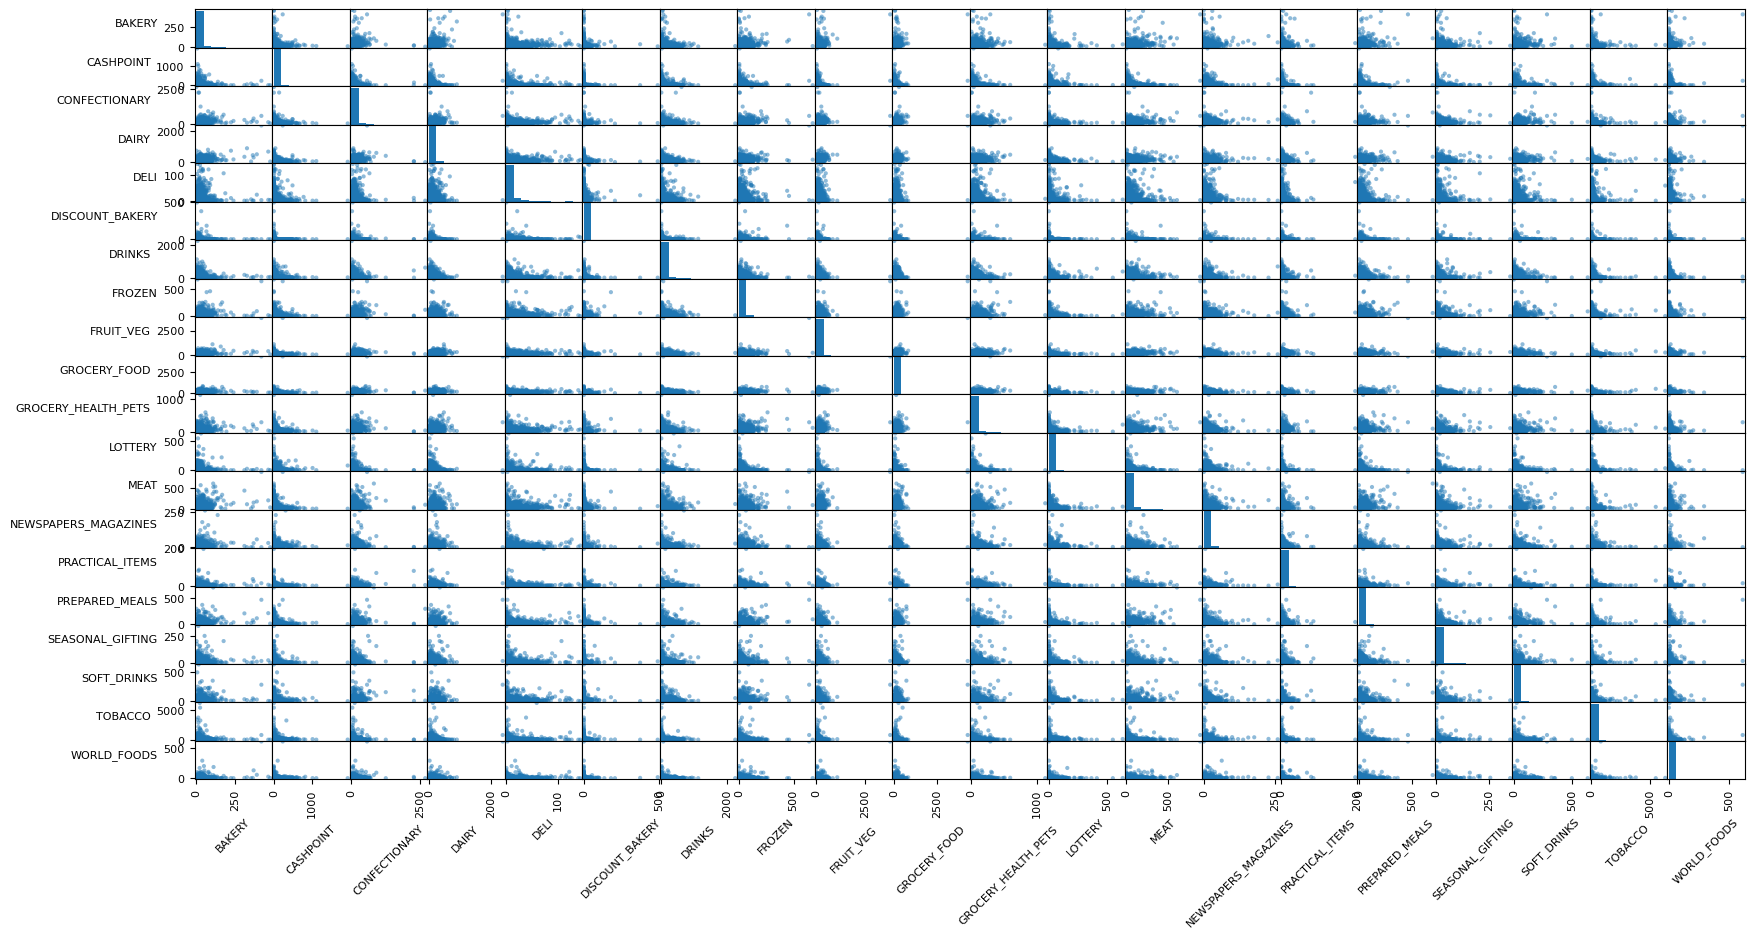

In [13]:
# Produce a scatter matrix for each pair of features in the data
scatter = pd.plotting.scatter_matrix(category, figsize = (20,10))

# Rotate axis labels
for ax in scatter.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

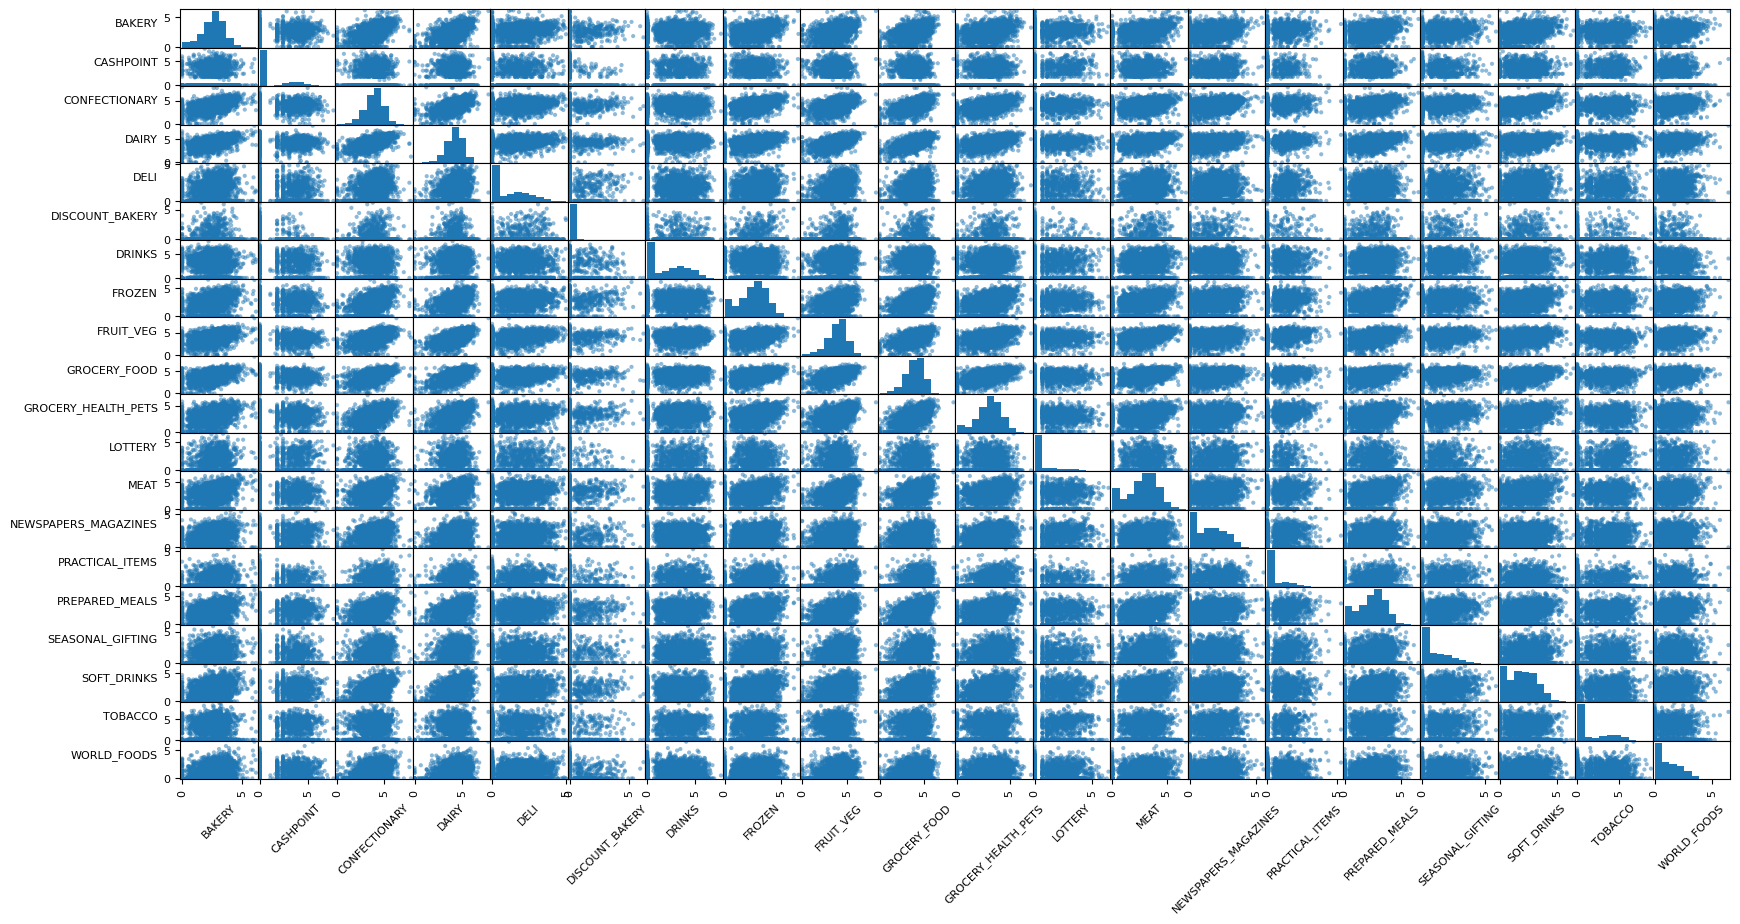

In [14]:
# Scale the data using the natural logarithm
logged_category = np.log(category + 1)

scatter = pd.plotting.scatter_matrix(logged_category, figsize = (20,10))

fontdict = {'fontsize': 8}
for ax in scatter.ravel():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.xaxis.label.set_fontsize(8)
    ax.yaxis.label.set_fontsize(8)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [15]:
# Delete the following three columns based on the figure and standard deviation data
category_drop = category.drop(['CASHPOINT','DISCOUNT_BAKERY','LOTTERY'],axis = 1)
# Normalize the category table after removing three features and retaining three features
logged_category_drop = np.log(category_drop + 1)
logged_category_drop

BAKERY  CONFECTIONARY     DAIRY      DELI    DRINKS    FROZEN  \
0     2.128232       3.278276  5.468440  0.000000  5.251226  3.071303   
1     2.346602       4.846704  5.207188  0.000000  0.000000  1.706565   
2     0.712950       1.456287  1.822935  3.304686  0.000000  1.022451   
3     2.713369       4.252630  4.129551  1.570697  2.639057  3.133754   
4     2.574138       4.339380  3.797734  2.539237  0.000000  1.585145   
...        ...            ...       ...       ...       ...       ...   
2995  1.941615       3.974998  3.767691  0.000000  3.711375  2.727853   
2996  1.809927       4.710701  3.185939  0.329304  3.246491  2.156403   
2997  2.758109       2.639057  3.684118  2.264883  0.000000  1.026042   
2998  2.445819       1.451614  3.579344  0.000000  4.993014  2.010895   
2999  2.351375       4.039888  3.476305  2.074429  3.603049  2.598235   

      FRUIT_VEG  GROCERY_FOOD  GROCERY_HEALTH_PETS      MEAT  \
0      2.739549      4.492561             3.273364  4.493792   
1      3.440739      4.618185             2.691921  4.100824   
2      4.047777      0.732368             2.683074  2.394252   
3      4.439588      4.215677             3.026746  3.998568   
4      3.135929      2.733718             2.136531  1.249902   
...         ...           ...                  ...       ...   
2995   2.401525      1.504077             0.912283  0.000000   
2996   2.842581      3.408504             2.289500  0.000000   
2997   3.564449      4.704472             2.244956  0.000000   
2998   4.313480      4.123742             2.830268  0.000000   
2999   4.015662      3.277145             3.174297  0.000000   

      NEWSPAPERS_MAGAZINES  PRACTICAL_ITEMS  PREPARED_MEALS  SEASONAL_GIFTING  \
0                 2.001480         0.000000        2.906354          2.152924   
1                 2.154085         0.000000        3.642312          0.000000   
2                 1.095273         0.000000        0.000000          3.139833   
3                 0.955511         0.924259        2.064328          2.314514   
4                 0.371564         0.000000        0.000000          0.000000   
...                    ...              ...             ...               ...   
2995              1.095273         0.000000        1.128171          0.000000   
2996              2.116256         0.000000        0.000000          2.009555   
2997              1.856298         0.000000        2.094330          0.000000   
2998              0.000000         0.000000        2.447551          0.000000   
2999              0.000000         1.481605        1.499623          0.000000   

      SOFT_DRINKS   TOBACCO  WORLD_FOODS  
0        1.950187  0.000000     3.545586  
1        3.439456  0.000000     1.680828  
2        1.427916  0.000000     4.023564  
3        2.479056  0.000000     0.783902  
4        0.783902  0.000000     1.915451  
...           ...       ...          ...  
2995     2.220290  5.001864     0.000000  
2996     2.888147  0.000000     1.701105  
2997     1.928619  0.000000     2.646175  
2998     2.503074  0.000000     0.371564  
2999     2.397895  0.000000     1.220830  

[3000 rows x 17 columns]

In [16]:
# def a visualization tool for dimensionality reduction
def display_factors(model, original_features):
   dimensions = range(1, len(model.components_) + 1)
   topics = pd.DataFrame(model.components_, columns = original_features)
   fig, ax = plt.subplots(figsize = (14,8))
   topics.plot(ax = ax, kind = 'bar');
   ax.set_ylabel("Original Feature Weights")
   ax.set_xlabel("Derived Factors")
   ax.set_xticklabels(dimensions, rotation=0)

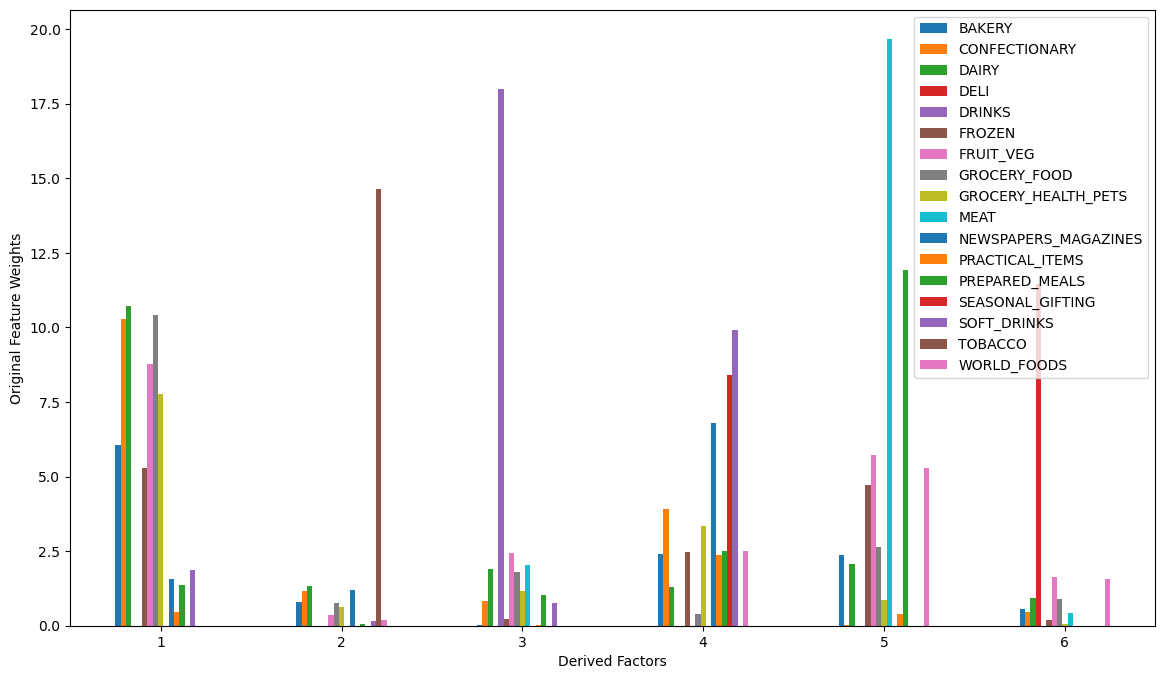

In [17]:
#-- Generate a nmf factorization of your data
nmf = NMF(n_components=6, random_state=0)
nmf.fit(logged_category_drop)

#-- And visualize the results
nmf_results = display_factors(nmf, logged_category_drop.columns)

In [18]:
#To find the proportion of each category in the reduced dimension, in text format
for t, topic in enumerate(nmf.components_):
    weightings = list(zip(topic, logged_category_drop.columns))

for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t)
    print("----------")
    
    #-- attach the feature name to each topic weighting
    weightings = list(zip(topic, logged_category_drop.columns))
 
    #-- sort the weightings into an order
    ordered_indeces = topic.argsort()
    #print(ordered_indeces)
    #-- make the order highest first
    reversed_indeces = ordered_indeces[::-1]
    #print(reversed_indeces)
    #-- reduce it down to only the top 5 items
    top_3_indeces = reversed_indeces[:5]
    
    #-- print the results out to screen
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))
   


TOPIC 0
----------
10.72 DAIRY
10.40 GROCERY_FOOD
10.28 CONFECTIONARY
8.77 FRUIT_VEG
7.76 GROCERY_HEALTH_PETS

TOPIC 1
----------
14.63 TOBACCO
1.34 DAIRY
1.20 NEWSPAPERS_MAGAZINES
1.18 CONFECTIONARY
0.81 BAKERY

TOPIC 2
----------
17.99 DRINKS
2.44 FRUIT_VEG
2.04 MEAT
1.91 DAIRY
1.79 GROCERY_FOOD

TOPIC 3
----------
9.91 SOFT_DRINKS
8.39 SEASONAL_GIFTING
6.78 NEWSPAPERS_MAGAZINES
3.90 CONFECTIONARY
3.36 GROCERY_HEALTH_PETS

TOPIC 4
----------
19.66 MEAT
11.91 PREPARED_MEALS
5.72 FRUIT_VEG
5.29 WORLD_FOODS
4.71 FROZEN

TOPIC 5
----------
11.47 DELI
1.62 FRUIT_VEG
1.58 WORLD_FOODS
0.93 DAIRY
0.91 GROCERY_FOOD


In [19]:
#The transformed data after NMF
logged_category_drop = nmf.transform(logged_category_drop)

# Create a DataFrame for the reduced data
category_reduce = pd.DataFrame(logged_category_drop)

category_reduce.columns=('GROCERIES','SMOKE','DRINKS','CELEBRATIONS_HOLIDAYS','COOKING','NOT_COOKING_FOODS')

category_reduce

GROCERIES     SMOKE    DRINKS  CELEBRATIONS_HOLIDAYS   COOKING  \
0      0.265189  0.006631  0.288175               0.198625  0.196412   
1      0.345595  0.008754  0.005295               0.162942  0.196831   
2      0.095052  0.000000  0.006540               0.202995  0.104070   
3      0.311692  0.000000  0.148767               0.174224  0.156377   
4      0.304135  0.004019  0.000000               0.022551  0.038974   
...         ...       ...       ...                    ...       ...   
2995   0.206578  0.340959  0.200561               0.096630  0.000000   
2996   0.263835  0.001986  0.173970               0.230438  0.000000   
2997   0.303428  0.005222  0.000637               0.101740  0.046269   
2998   0.283999  0.000000  0.281699               0.054071  0.031949   
2999   0.311858  0.000000  0.198031               0.097317  0.009138   

      NOT_COOKING_FOODS  
0              0.017001  
1              0.000485  
2              0.331995  
3              0.133564  
4              0.237160  
...                 ...  
2995           0.000000  
2996           0.041465  
2997           0.223712  
2998           0.007030  
2999           0.186130  

[3000 rows x 6 columns]

# Segmentation Methodology

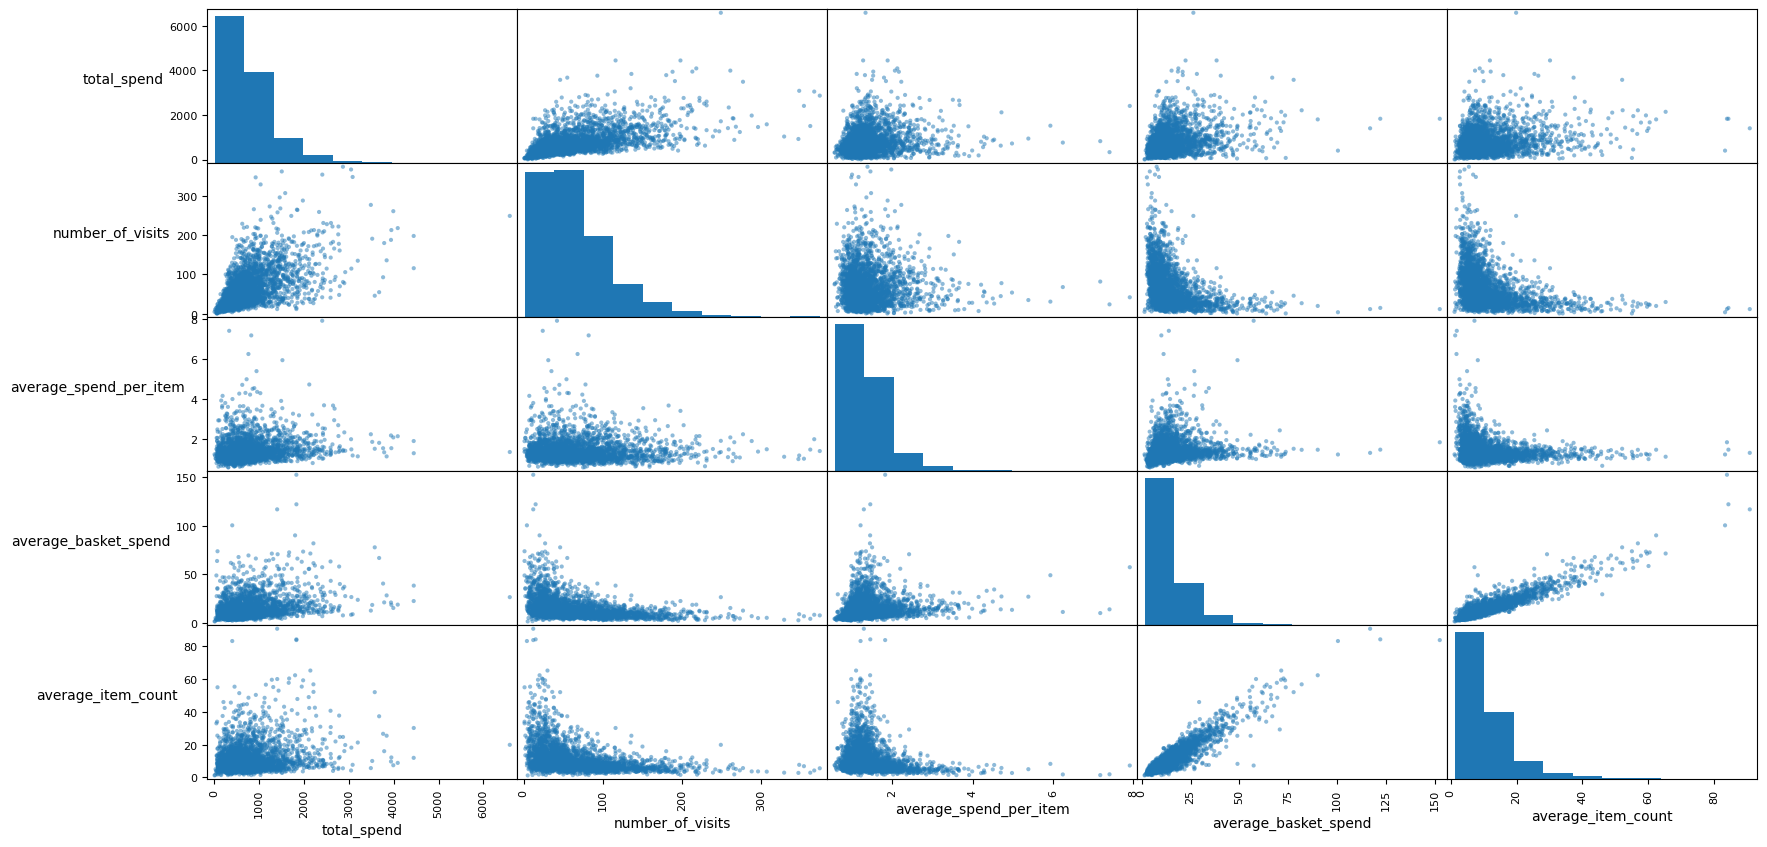

In [20]:
#-- Produce a scatter matrix for each pair of features in the data
scatter = pd.plotting.scatter_matrix(customers, figsize = (20,10))

for ax in scatter.ravel():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

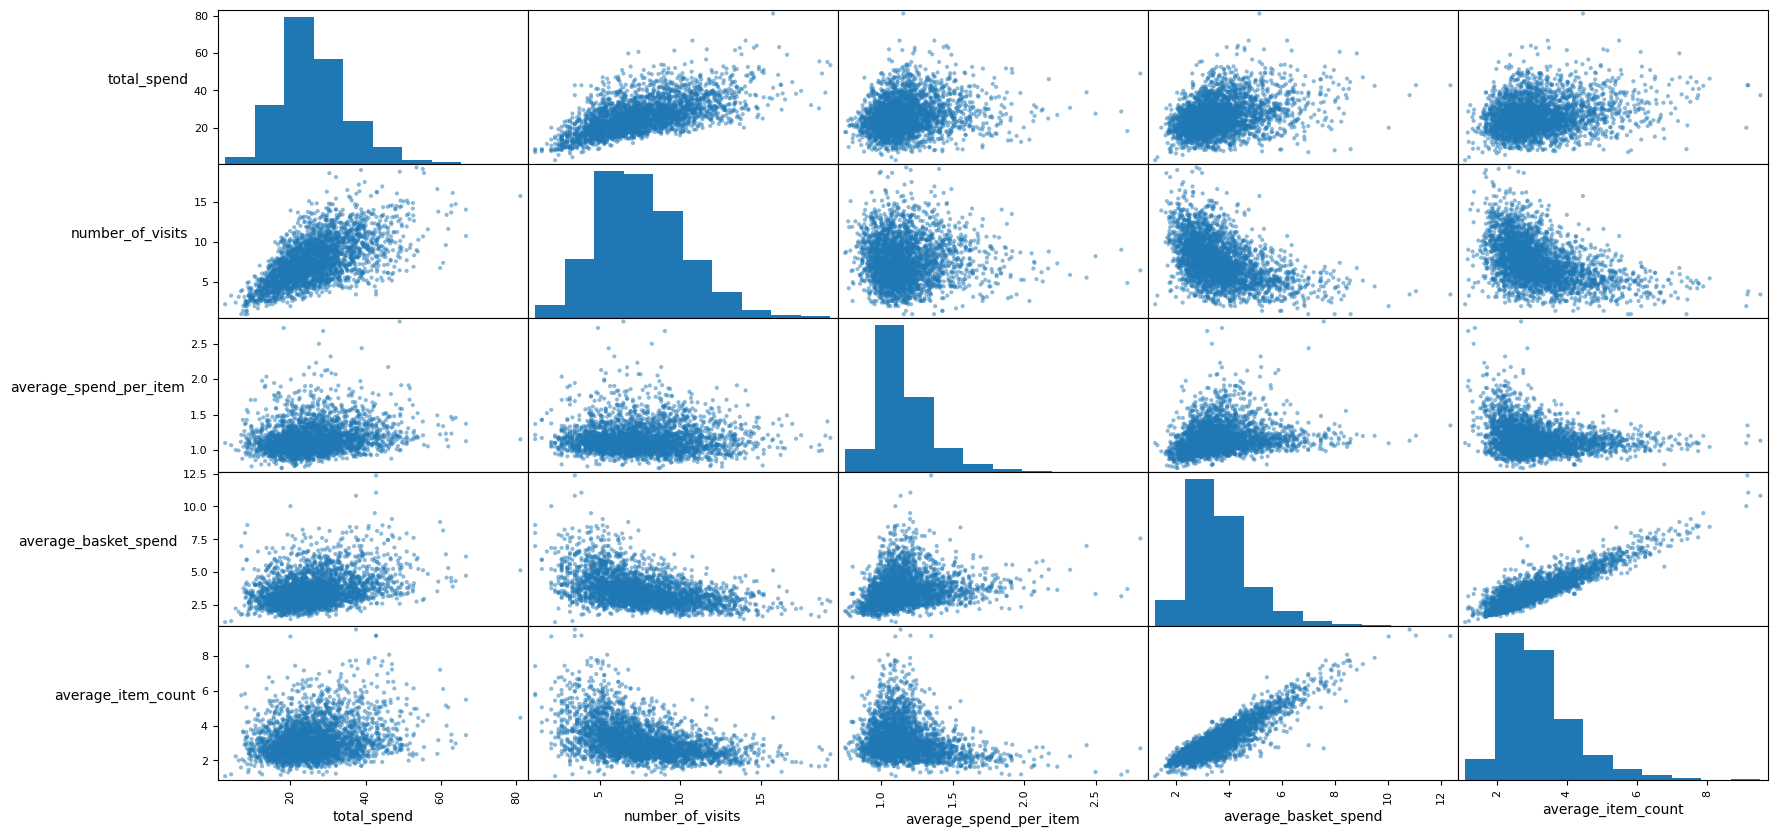

In [21]:
# Scale the data using the natural logarithm
logged_customers = np.sqrt(customers)

#-- Produce a scatter matrix using the Scaled data...
scatter = pd.plotting.scatter_matrix(logged_customers, figsize = (20,10))

for ax in scatter.ravel():
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

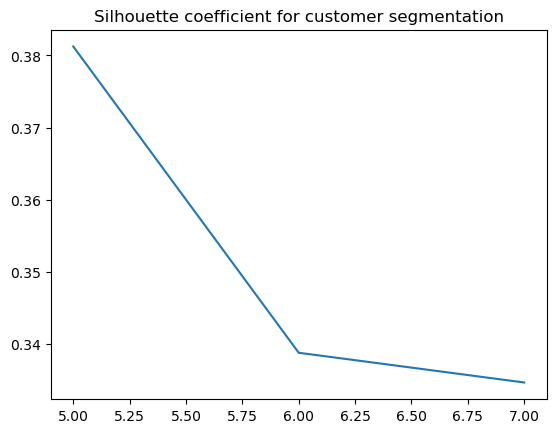

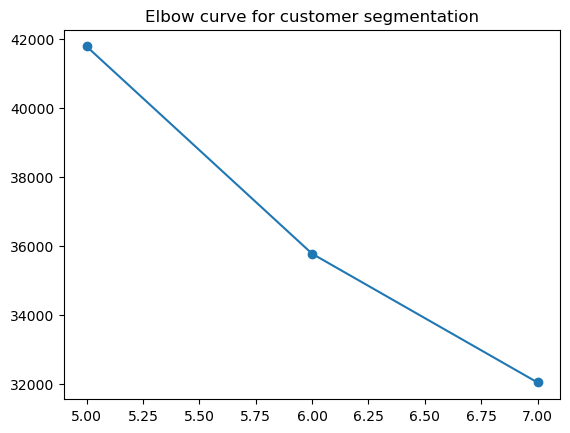

In [22]:
# Create range of clusters 
range_n_clusters = list(range(5, 8))
range_score = []
inertia = []
#Loop through clusters
for n_clusters in range_n_clusters:
    #Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters,random_state = 0).fit(logged_customers)

    #Predict the cluster for each data point
    preds = clusterer.predict(logged_customers)

    #Find the cluster centers
    centers = clusterer.cluster_centers_

    #Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(logged_customers, preds, metric='euclidean')
    range_score.append(score)
    
    #Calculate the distortions for the number of clusters chosen
    inertia.append(clusterer.inertia_)

    
plt.plot(range_n_clusters, range_score)
plt.title('Silhouette coefficient for customer segmentation')
plt.show()
print()
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow curve for customer segmentation')
plt.show()

# Results

In [23]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=5,random_state = 0).fit(logged_customers)
preds = clusterer.predict(logged_customers)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
Segments = pd.DataFrame(preds, columns = ['segment'])

#-- Put the predictions into a pandas dataframe format
Spend_data = pd.concat([Segments, logged_customers], axis = 1)

Spend_data

segment  total_spend  number_of_visits  average_spend_per_item  \
0           0    25.994615          7.483315                1.128070   
1           4    24.201859          5.744563                0.945645   
2           1    14.905704          7.681146                0.869318   
3           4    23.406623          6.082763                1.047824   
4           1    17.127171          6.928203                1.021721   
...       ...          ...               ...                     ...   
2995        0    26.071057          7.348469                1.452883   
2996        1    15.856544          6.480741                0.968593   
2997        4    18.823390          7.483315                1.034627   
2998        4    21.513019          5.385165                1.242055   
2999        1    18.176908          4.123106                1.245461   

      average_basket_spend  average_item_count  
0                 3.474191            3.078961  
1                 4.213075            4.455334  
2                 1.941649            2.231591  
3                 3.848376            3.672874  
4                 2.471841            2.418677  
...                    ...                 ...  
2995              3.548239            2.441311  
2996              2.447448            2.525866  
2997              2.515949            2.431049  
2998              3.994997            3.215587  
2999              4.409082            3.539774  

[3000 rows x 6 columns]

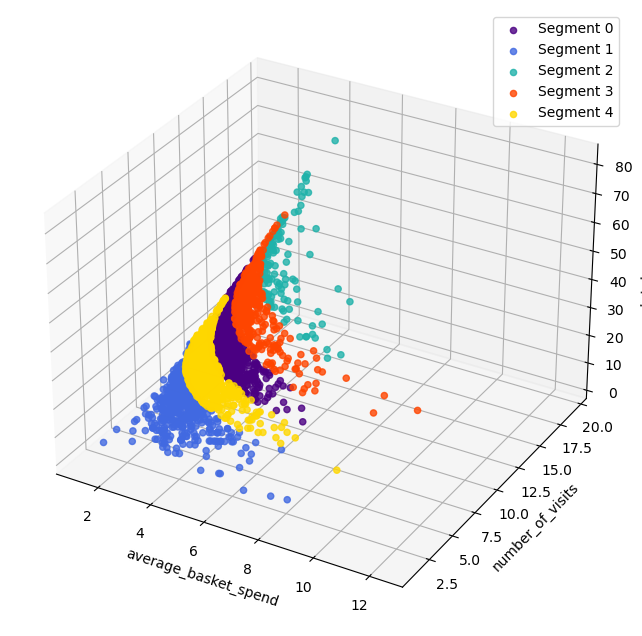

In [24]:
# create a dictionary to map cluster numbers to colors, choose a nice color
color_map = {0: '#4B0082', 1: '#4169E1', 2: '#20B2AA', 3: '#FF4500', 4: '#FFD700'}

# create a 3D scatter plot with different colors for different clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for segment in np.unique(Spend_data['segment']):
    ax.scatter(Spend_data.loc[Spend_data['segment'] == segment, 'average_basket_spend'], 
               Spend_data.loc[Spend_data['segment'] == segment, 'number_of_visits'], 
               Spend_data.loc[Spend_data['segment'] == segment, 'total_spend'],
               c=color_map[segment], 
               marker='o', 
               alpha=0.8,
               label=f'Segment {segment}')
ax.set_xlabel('average_basket_spend')
ax.set_ylabel('number_of_visits')
ax.set_zlabel('total_spend')
ax.legend()

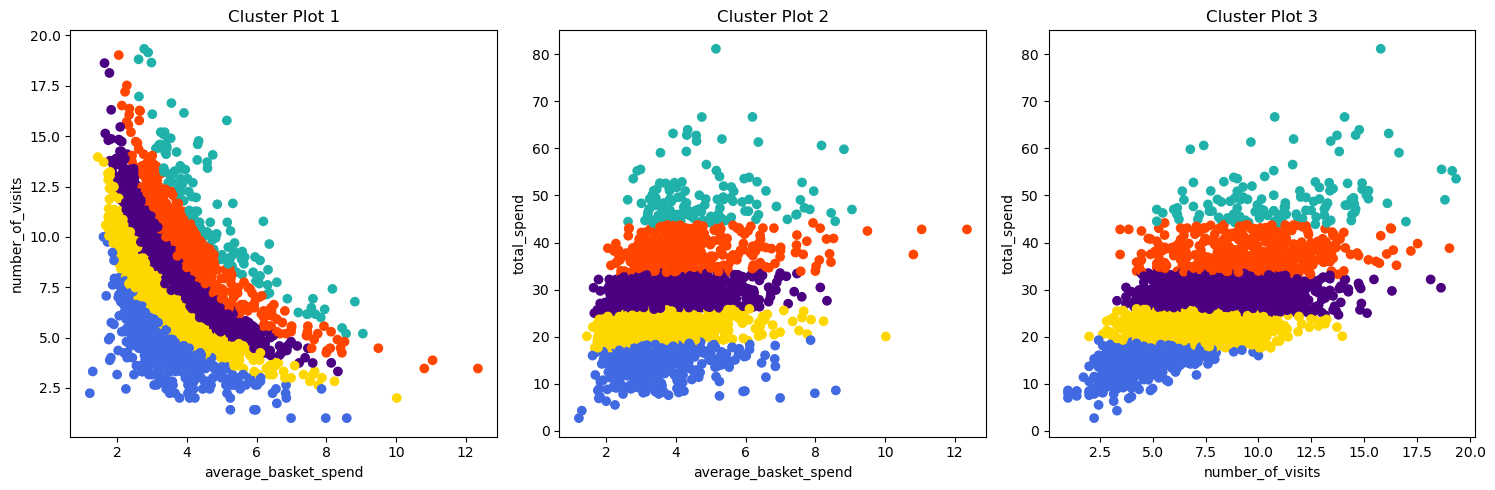

In [25]:
#Create multiple 2D figures
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
plt.subplot(1, 3, 1)
plt.scatter(Spend_data['average_basket_spend'], Spend_data['number_of_visits'], c=Spend_data['segment'].map(color_map))
plt.xlabel('average_basket_spend')
plt.ylabel('number_of_visits')
plt.title('Cluster Plot 1')

# Plot 2
plt.subplot(1, 3, 2)
plt.scatter(Spend_data['average_basket_spend'], Spend_data['total_spend'], c=Spend_data['segment'].map(color_map))
plt.xlabel('average_basket_spend')
plt.ylabel('total_spend')
plt.title('Cluster Plot 2')

# Plot 3
plt.subplot(1, 3, 3)
plt.scatter(Spend_data['number_of_visits'], Spend_data['total_spend'], c=Spend_data['segment'].map(color_map))
plt.xlabel('number_of_visits')
plt.ylabel('total_spend')
plt.title('Cluster Plot 3')

# Show the plots
plt.tight_layout()
plt.show()


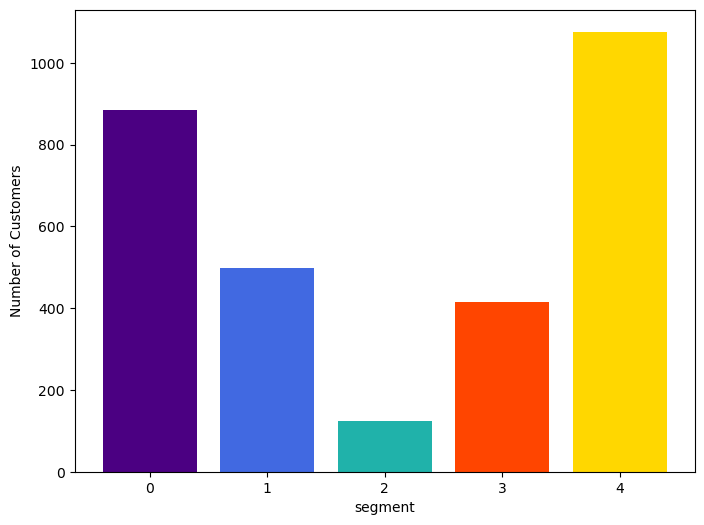

In [26]:
# create a bar chart showing the number of customers in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
cluster_counts = Spend_data.groupby('segment').size()
ax.bar(cluster_counts.index, cluster_counts.values, color=[color_map[c] for c in cluster_counts.index])
ax.set_xlabel('segment')
ax.set_ylabel('Number of Customers')
ax.set_xticks(cluster_counts.index)
ax.set_xticklabels(cluster_counts.index)
plt.show()

In [27]:
# Exponentiate the centres,return the ture value
true_centres = np.square(centres)

# Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pd.DataFrame(np.round(true_centres), columns = customers.columns)
true_centres.index = segments
true_centres

total_spend  number_of_visits  average_spend_per_item  \
Segment 0        847.0              72.0                     1.0   
Segment 1        214.0              22.0                     1.0   
Segment 2       2487.0             125.0                     2.0   
Segment 3       1440.0              95.0                     2.0   
Segment 4        486.0              48.0                     1.0   

           average_basket_spend  average_item_count  
Segment 0                  14.0                10.0  
Segment 1                  11.0                 9.0  
Segment 2                  23.0                15.0  
Segment 3                  18.0                13.0  
Segment 4                  12.0                 9.0

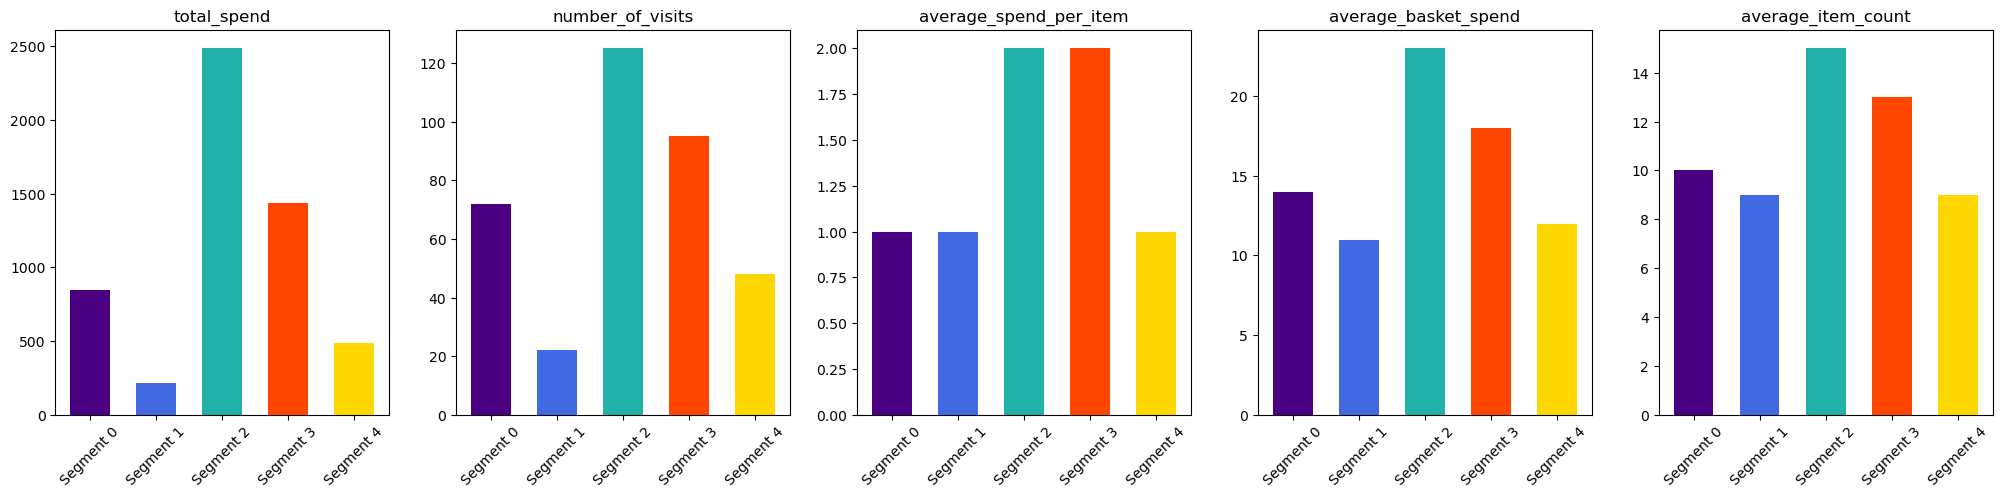

In [28]:
#figure of the true centers of each segment.
color_map = {0: '#4B0082', 1: '#4169E1', 2: '#20B2AA', 3: '#FF4500', 4: '#FFD700'}

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
# Plot each column as a bar chart
for i, col in enumerate(true_centres.columns):
    ax = axs[i]
    ax.bar(true_centres.index, true_centres[col],width=0.6, color=[color_map[c] for c in cluster_counts.index])
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=45)

plt.show()

In [29]:
#Return the actual customer spending data
Customer_segment = pd.concat([Segments, customers], axis = 1)
Customer_segment

segment  total_spend  number_of_visits  average_spend_per_item  \
0           0       675.72                56                1.272542   
1           4       585.73                33                0.894244   
2           1       222.18                59                0.755714   
3           4       547.87                37                1.097936   
4           1       293.34                48                1.043915   
...       ...          ...               ...                     ...   
2995        0       679.70                54                2.110870   
2996        1       251.43                42                0.938172   
2997        4       354.32                56                1.070453   
2998        4       462.81                29                1.542700   
2999        1       330.40                17                1.551174   

      average_basket_spend  average_item_count  
0                    12.07                9.48  
1                    17.75               19.85  
2                     3.77                4.98  
3                    14.81               13.49  
4                     6.11                5.85  
...                    ...                 ...  
2995                 12.59                5.96  
2996                  5.99                6.38  
2997                  6.33                5.91  
2998                 15.96               10.34  
2999                 19.44               12.53  

[3000 rows x 6 columns]

In [30]:
# the consumption patterns for each segment
segment_sum = Customer_segment.groupby('segment').sum()
segment_sum['segment_count'] = Customer_segment.groupby('segment')['total_spend'].count()
segment_sum

total_spend  number_of_visits  average_spend_per_item  \
segment                                                          
0          753520.71             68775             1267.686704   
1          111019.51             12311              663.709244   
2          315241.09             16931              213.508849   
3          600772.43             42261              642.292749   
4          527685.07             55269             1397.336791   

         average_basket_spend  average_item_count  segment_count  
segment                                                           
0                    13153.50             9952.50            885  
1                     6167.06             4876.07            499  
2                     3159.85             2104.99            125  
3                     8313.84             5907.87            415  
4                    13609.59            10979.09           1076

In [31]:
# Average consumption situation for each segment
segment_avg = pd.DataFrame()
segment_avg = Customer_segment.groupby('segment').mean()
segment_avg

total_spend  number_of_visits  average_spend_per_item  \
segment                                                          
0         851.435831         77.711864                1.432414   
1         222.483988         24.671343                1.330079   
2        2521.928720        135.448000                1.708071   
3        1447.644410        101.833735                1.547693   
4         490.413634         51.365242                1.298640   

         average_basket_spend  average_item_count  
segment                                            
0                   14.862712           11.245763  
1                   12.358838            9.771683  
2                   25.278800           16.839920  
3                   20.033349           14.235831  
4                   12.648318           10.203615

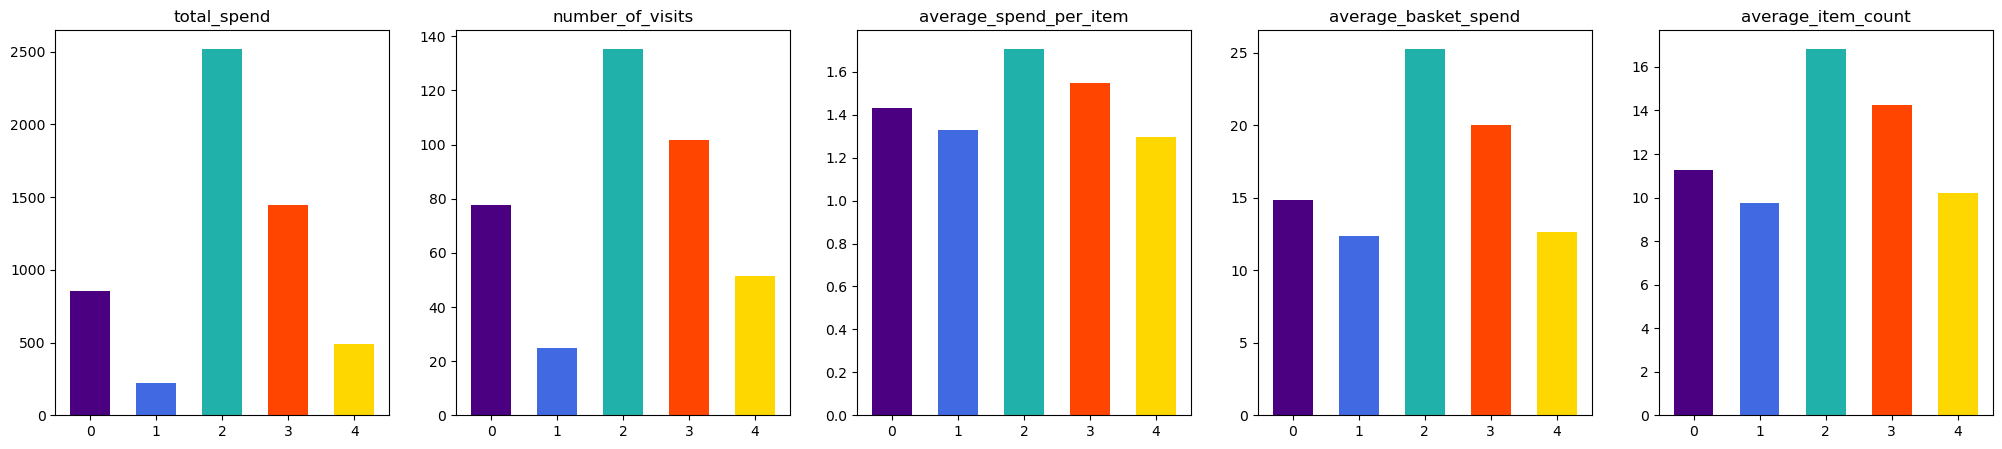

In [32]:
# Visualization of the Mean Value
import matplotlib.pyplot as plt

color_map = {0: '#4B0082', 1: '#4169E1', 2: '#20B2AA', 3: '#FF4500', 4: '#FFD700'}

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
# Plot each column as a bar chart
for i, col in enumerate(segment_avg.columns):
    ax = axs[i]
    ax.bar(segment_avg.index, segment_avg[col],width=0.6, color=[color_map[c] for c in cluster_counts.index])
    ax.set_title(col)

plt.show()

In [33]:
#Difference between segment average and overall average
segment_diff = pd.DataFrame()
segment_diff['total_spend'] = segment_avg['total_spend'] - customers.total_spend.mean()
segment_diff['number_of_visits'] = segment_avg['number_of_visits'] - customers.number_of_visits.mean()
segment_diff['average_spend_per_item'] = segment_avg['average_spend_per_item'] - customers.average_spend_per_item.mean()
segment_diff['average_basket_spend'] = segment_avg['average_basket_spend'] - customers.average_basket_spend.mean()
segment_diff['average_item_count'] = segment_avg['average_item_count'] - customers.average_item_count.mean()
segment_diff

total_spend  number_of_visits  average_spend_per_item  \
segment                                                          
0          82.022894         12.529531                0.037570   
1        -546.928949        -40.510991               -0.064766   
2        1752.515783         70.265667                0.313226   
3         678.231473         36.651402                0.152849   
4        -278.999303        -13.817092               -0.096205   

         average_basket_spend  average_item_count  
segment                                            
0                    0.061432           -0.027744  
1                   -2.442442           -1.501823  
2                   10.477520            5.566413  
3                    5.232069            2.962325  
4                   -2.152962           -1.069891

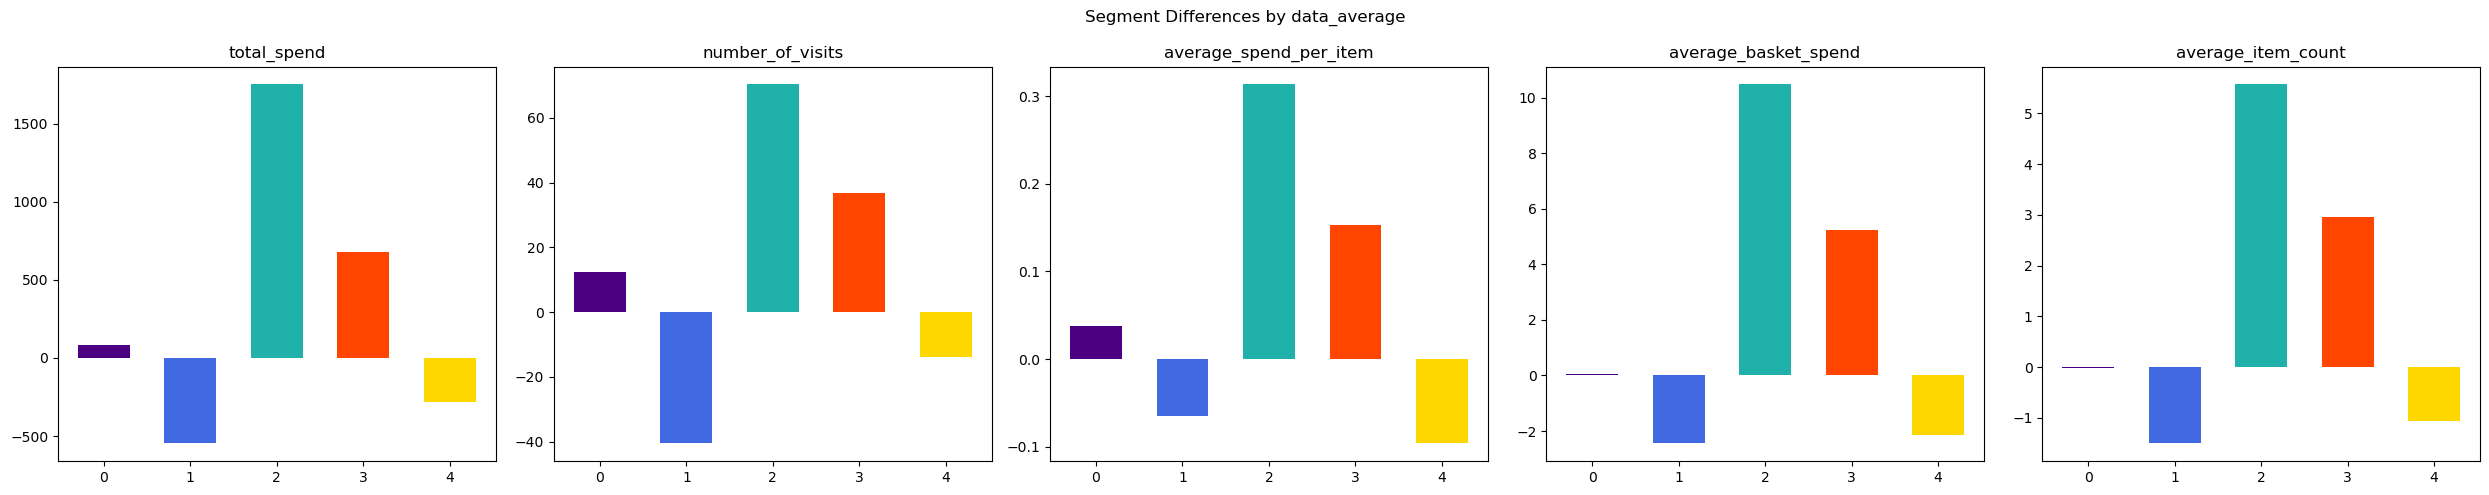

In [34]:
# Display of the difference between segment and overall average level.
color_map = {0: '#4B0082', 1: '#4169E1', 2: '#20B2AA', 3: '#FF4500', 4: '#FFD700'}

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
# Plot each column as a bar chart
for i, col in enumerate(segment_diff.columns):
    ax = axs[i]
    ax.bar(segment_diff.index, segment_diff[col],width=0.6, color=[color_map[c] for c in cluster_counts.index])
    ax.set_title(col)


# Set overall title and adjust spacing
fig.suptitle('Segment Differences by data_average')
plt.tight_layout()

In [35]:
#Extract segment number
Segment_number = Customer_segment['segment']
#link the customer ID and segment ID
customer_segment_number = pd.concat([customer_columns, Segment_number], axis = 1)

In [36]:
#concat the customer ID, segment ID, and the table of reduced categories into a new table
Category_segment = pd.concat([customer_segment_number, category_reduce], axis = 1)
Category_segment

customer_number  segment  GROCERIES     SMOKE    DRINKS  \
0                  14        0   0.265189  0.006631  0.288175   
1                  45        4   0.345595  0.008754  0.005295   
2                  52        1   0.095052  0.000000  0.006540   
3                  61        4   0.311692  0.000000  0.148767   
4                  63        1   0.304135  0.004019  0.000000   
...               ...      ...        ...       ...       ...   
2995            16295        0   0.206578  0.340959  0.200561   
2996            16301        1   0.263835  0.001986  0.173970   
2997            16303        4   0.303428  0.005222  0.000637   
2998            16306        4   0.283999  0.000000  0.281699   
2999            16316        1   0.311858  0.000000  0.198031   

      CELEBRATIONS_HOLIDAYS   COOKING  NOT_COOKING_FOODS  
0                  0.198625  0.196412           0.017001  
1                  0.162942  0.196831           0.000485  
2                  0.202995  0.104070           0.331995  
3                  0.174224  0.156377           0.133564  
4                  0.022551  0.038974           0.237160  
...                     ...       ...                ...  
2995               0.096630  0.000000           0.000000  
2996               0.230438  0.000000           0.041465  
2997               0.101740  0.046269           0.223712  
2998               0.054071  0.031949           0.007030  
2999               0.097317  0.009138           0.186130  

[3000 rows x 8 columns]

In [37]:
#View the weight of different product categories for each customer segment
category_segment_mean = Category_segment.groupby('segment').mean().drop('customer_number', axis=1)
category_segment_mean

GROCERIES     SMOKE    DRINKS  CELEBRATIONS_HOLIDAYS   COOKING  \
segment                                                                   
0         0.319390  0.133108  0.135137               0.143191  0.139048   
1         0.229201  0.059187  0.083832               0.078150  0.089221   
2         0.364576  0.244944  0.206399               0.258483  0.194984   
3         0.344353  0.202485  0.162082               0.186104  0.159234   
4         0.292254  0.084672  0.111757               0.105762  0.114050   

         NOT_COOKING_FOODS  
segment                     
0                 0.117454  
1                 0.067922  
2                 0.154968  
3                 0.137824  
4                 0.098341

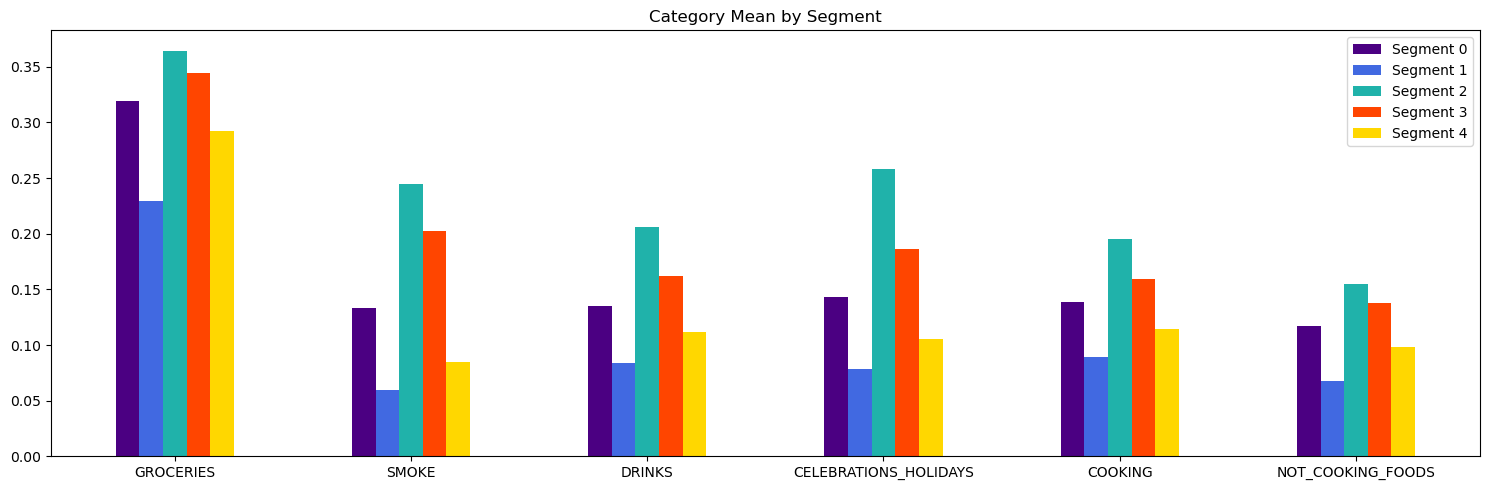

In [38]:
# the performance of each segment in each category
color_map = {0: '#4B0082', 1: '#4169E1', 2: '#20B2AA', 3: '#FF4500', 4: '#FFD700'}

fig, ax = plt.subplots(figsize=(15, 5))
width = 0.1

# Plot each segment as a set of bars
for i, segment in enumerate(category_segment_mean.index):
    x = np.arange(len(category_segment_mean.columns)) + i * width
    ax.bar(x, category_segment_mean.loc[segment], width=width, color=color_map[segment], label=f"Segment {segment}")
    

# Set xticks and labels
ax.set_xticks(np.arange(len(category_segment_mean.columns)) + width * 2)
ax.set_xticklabels(category_segment_mean.columns) 
# Add legend and title
ax.legend()
ax.set_title('Category Mean by Segment')

plt.tight_layout()
plt.show()


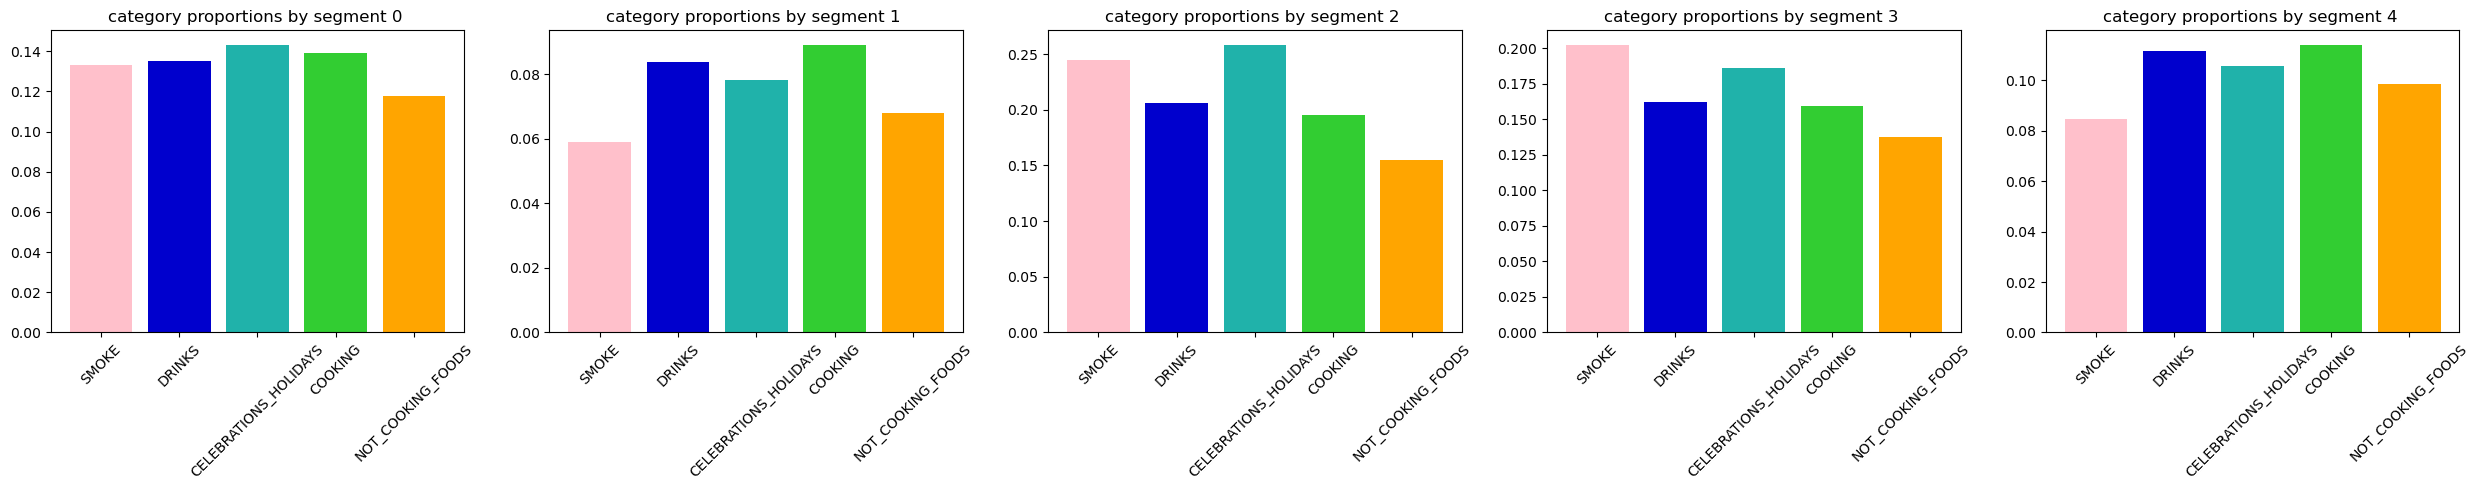

In [39]:
# the performance of each category in each segment
category_segment_proportions = category_segment_mean.drop('GROCERIES',axis = 1)
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
color_map = {'SMOKE': '#FFC0CB', 'DRINKS': '#0000CD', 'CELEBRATIONS_HOLIDAYS': '#20B2AA', 
             'COOKING': '#32CD32','NOT_COOKING_FOODS': '#FFA500'}

for i, category in enumerate(category_segment_proportions.index):
    ax = axs[i]
    axs[i].bar(category_segment_proportions.columns, category_segment_proportions.loc[category]
               ,color=[color_map.get(col) for col in category_segment_proportions.columns])
    axs[i].set_title(f'category proportions by segment {category} ')
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [40]:
#Save customer ID and segment ID in CSV file
customer_segment_number.to_csv('Customer segments.csv',index = False)